# Unit 5 - Financial Planning

In [33]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

%matplotlib inline

In [104]:
# Load .env enviroment variables
load_dotenv('.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

In [105]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [106]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc=requests.get(btc_url)
print(response_data_btc)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()

#print(json.dumps(data_btc, indent=4))

btc_df = data_btc['data']


my_btc=btc_df['1']['name']

my_btc_value=btc_df['1']['quotes']['CAD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
response_data_eth=requests.get(eth_url)
print(response_data_eth)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()


eth_df = data_eth['data']

my_eth=eth_df['1027']['name']
# Compute current value of my crpto
# YOUR CODE HERE!
my_eth_value=eth_df['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

<Response [200]>
<Response [200]>
The current value of your Bitcoin BTC is $25238.65
The current value of your Ethereum ETH is $1728.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [107]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [108]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv ("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")
                            
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST (
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2" )
    

Alpaca key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [109]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-08-07", tz="America/Toronto").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portofolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portofolio.head()
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portofolio [df_portofolio ['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_portofolio [df_portofolio ['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portofolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Preview DataFrame
# YOUR CODE HERE!
df_portofolio

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [110]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portofolio["AGG"]["close"])
spy_close_price = float(df_portofolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [111]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [112]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
# Set current amount of shares data
amount_data = {
    "amount": [19385.986877, 40616.500000]
}

# Set the tickers
tickers = ["crypto", "shares"]  

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(amount_data, index=tickers)
# Display savings DataFrame
display(df_savings)

,amount
crypto,19385.986877
shares,40616.500000


<AxesSubplot:title={'center':'Composition of Personnal Savings'}, ylabel='amount'>

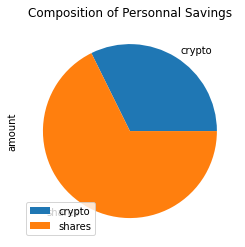

In [113]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personnal Savings")

In [114]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund = 12000 * 3
# Calculate total amount of savings
# YOUR CODE HERE!
total_saving = float(df_savings.loc["crypto"])
# Validate saving health
# YOUR CODE HERE!
if total_saving > emergency_fund:
    print(f"Congratulating the person for having enough money in this fund.")
elif total_saving == emergency_fund:
   print(f"congratulating the person on reaching this financial goal.")
elif total_saving <= emergency_fund:
  print(f"showing how many dollars away the person is from reaching the goal.")
  

showing how many dollars away the person is from reaching the goal.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_portofolio_5years = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
#df_portofolio_of5years

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portofolio_5years [df_portofolio_5years ['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_portofolio_5years[df_portofolio_5years ['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [86]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [37]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004520,0.997520,1.001979,1.002979,1.003487,1.010836,0.995911,0.998058,1.003123,0.998967,...,1.008369,0.996157,0.986915,1.001995,0.997529,1.002642,0.999727,0.994300,0.999683,1.005614
2,1.004917,0.994473,0.995974,1.005267,1.008913,1.011076,1.002338,1.003618,1.004058,0.999011,...,1.004005,0.998514,0.986435,1.004872,1.002623,1.003659,1.002689,0.989445,1.001675,1.003300
3,1.005365,0.995383,0.993653,1.017544,1.005735,1.019020,1.004388,1.011630,1.008767,0.987564,...,1.004973,0.993654,0.987394,1.006601,1.004049,1.003322,0.996489,0.987057,1.001357,1.003336
4,1.014979,1.000274,0.997693,1.018812,1.013333,1.012776,1.000007,1.006905,1.006169,0.984389,...,1.000428,0.998138,0.991863,1.010841,1.002236,1.000207,0.999716,0.988482,1.007041,1.003954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.995098,2.449601,4.765548,6.256648,5.752992,4.337113,3.499206,6.662441,6.330723,5.459907,...,3.836988,7.001145,4.909290,9.276309,5.976133,8.196067,4.427259,7.522726,6.516112,9.789464
7557,11.097257,2.472604,4.730749,6.245571,5.779129,4.336602,3.486749,6.707951,6.391536,5.525650,...,3.834687,7.037160,4.887387,9.247807,5.976095,8.184411,4.414930,7.552824,6.521519,9.814654
7558,11.177241,2.455939,4.718801,6.268038,5.761664,4.343047,3.475029,6.664091,6.379062,5.501522,...,3.835071,7.057923,4.855791,9.286776,5.988567,8.144299,4.403826,7.503359,6.479542,9.824883
7559,11.157170,2.457066,4.736953,6.259897,5.757209,4.353225,3.472964,6.679597,6.362335,5.521861,...,3.836332,7.045664,4.855661,9.364859,5.987984,8.165847,4.421721,7.450087,6.483960,9.840911


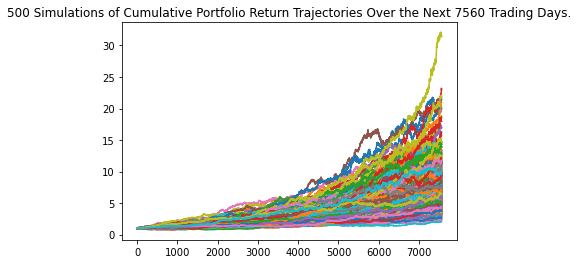

In [39]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30year.plot_simulation()

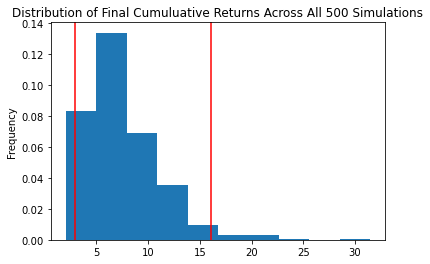

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              7.506383
std               3.578999
min               2.033772
25%               4.989823
50%               6.728785
75%               9.143625
max              31.462654
95% CI Lower      2.953310
95% CI Upper     16.026183
Name: 7560, dtype: float64


/Users/akane2518/Fintech/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [42]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59066.2 and $320523.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [43]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $88599.3 and $480785.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [45]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001449,1.000336,1.003232,1.001755,0.995356,1.009939,0.994924,0.988826,1.005085,1.000912,...,1.002246,0.995325,1.002726,0.998526,0.995979,0.994434,0.985260,1.003001,1.001029,1.012048
2,0.997942,1.000758,1.004207,1.013431,0.998315,1.008186,1.002339,0.977685,1.002772,0.998967,...,0.999724,1.000192,1.002773,1.000860,0.997557,0.987790,0.981125,1.008191,1.000290,1.020089
3,1.006418,1.003006,1.002113,1.023483,1.007008,0.999450,0.996392,0.976020,1.006342,1.002430,...,0.996106,1.001266,1.004643,1.006631,1.001533,0.981007,0.970619,1.011024,0.999612,1.019256
4,1.006363,0.999872,1.001472,1.017611,1.002146,1.002419,0.996428,0.976750,1.004411,1.005537,...,0.990078,1.002796,1.009633,1.009304,1.010808,0.984309,0.976199,1.005727,1.001092,1.024838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.365665,1.595666,1.851022,1.307281,1.725846,1.292790,1.269399,1.544781,1.533721,1.437821,...,1.407135,1.807725,1.054307,1.400469,1.046548,1.251373,1.347356,1.711135,1.505858,1.057597
1257,1.368719,1.597299,1.873305,1.300891,1.715279,1.295719,1.271778,1.546948,1.539289,1.442897,...,1.401581,1.806546,1.048510,1.396778,1.044166,1.250720,1.341220,1.712789,1.505867,1.054920
1258,1.374830,1.592143,1.885853,1.305785,1.718561,1.293951,1.266288,1.537551,1.543223,1.446052,...,1.388338,1.816019,1.047822,1.394492,1.042313,1.249882,1.342102,1.713641,1.505771,1.058737
1259,1.362680,1.597023,1.869637,1.305835,1.707383,1.307269,1.267838,1.541005,1.547483,1.442976,...,1.376867,1.812859,1.058278,1.397256,1.039409,1.249286,1.337841,1.712550,1.491757,1.052835


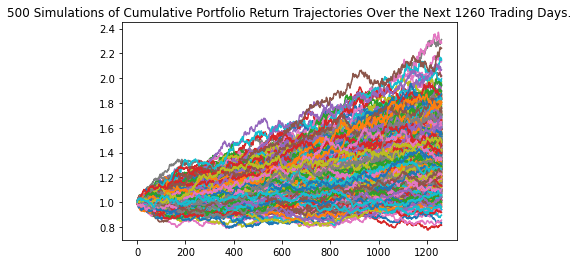

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_5year.plot_simulation()

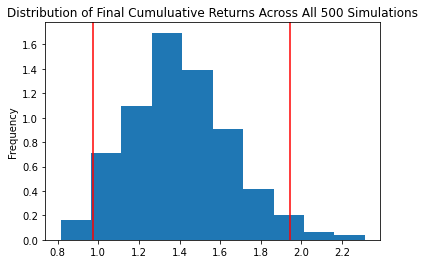

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_5year.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_5year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.401824
std               0.253305
min               0.814112
25%               1.216833
50%               1.383559
75%               1.560284
max               2.312192
95% CI Lower      0.972042
95% CI Upper      1.943444
Name: 1260, dtype: float64


/Users/akane2518/Fintech/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [55]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58322.55 and $116606.63


### Ten Years Retirement Option

In [57]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [58]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991712,1.006157,0.999259,1.003341,0.999360,1.011144,1.001790,1.007423,0.994603,0.991004,...,1.006741,1.001386,1.009100,1.000605,0.995327,0.999109,0.995074,1.001640,1.000426,0.996670
2,0.989872,0.999601,0.993975,1.004049,0.997990,1.004248,1.003138,1.007246,0.994340,0.993078,...,1.011666,1.004412,1.004613,1.005927,0.992461,0.999585,1.002083,1.009540,1.001555,0.981933
3,0.987720,1.005114,0.987164,0.995427,1.001010,1.004815,1.002714,1.003666,0.985123,0.994613,...,1.015197,1.003581,1.001188,1.008129,0.989732,1.003612,1.005606,1.015368,1.007080,0.979713
4,0.990066,1.004825,0.983625,1.001919,1.007560,0.993562,1.002575,1.006786,0.989713,0.997518,...,1.005586,1.010271,1.004532,1.004319,0.994596,1.006173,1.004565,1.014068,1.008190,0.974219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.296358,2.176224,2.131636,1.422099,2.302327,2.280490,2.808615,1.810092,1.665770,1.905364,...,2.102533,2.066697,1.941127,2.008214,1.731179,2.255839,2.429287,2.468351,2.151753,1.875881
2517,2.320668,2.186695,2.132089,1.431840,2.299045,2.270025,2.813028,1.814460,1.662321,1.895483,...,2.109918,2.050375,1.946195,2.005052,1.717345,2.280800,2.417628,2.475304,2.137298,1.883027
2518,2.323499,2.194275,2.136929,1.431262,2.318860,2.253443,2.811704,1.812890,1.672584,1.889465,...,2.112711,2.046802,1.943360,2.001552,1.719633,2.288220,2.403609,2.467315,2.136623,1.874553
2519,2.339994,2.201973,2.163069,1.421385,2.339157,2.240650,2.817707,1.797892,1.660119,1.904502,...,2.095063,2.066367,1.949173,2.000443,1.722103,2.273314,2.433521,2.469661,2.158578,1.875114


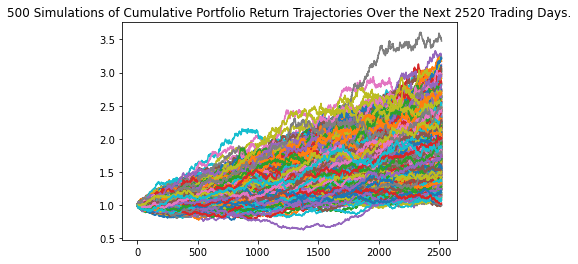

In [59]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_10year.plot_simulation()

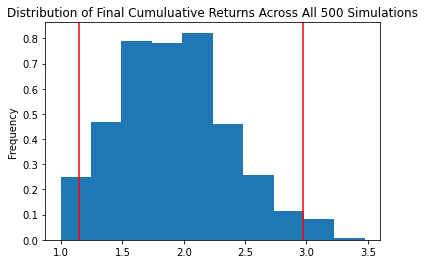

In [60]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_10year.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_10year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.929808
std               0.461975
min               0.995372
25%               1.592334
50%               1.906458
75%               2.214173
max               3.476136
95% CI Lower      1.147528
95% CI Upper      2.970589
Name: 2520, dtype: float64


/Users/akane2518/Fintech/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [63]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68851.68 and $178235.35
